<font size="+5">#09. Cluster Analysis con k-Means</font>

- Book + Private Lessons [Here ↗](https://sotastica.com/reservar)
- Subscribe to my [Blog ↗](https://blog.pythonassembly.com/)
- Let's keep in touch on [LinkedIn ↗](www.linkedin.com/in/jsulopz) 😄

# Load the Data

> - Simply execute the following lines of code to load the data
> - This dataset contains **statistics** (columns)
> - About **Car Models** (rows)

In [1]:
import seaborn as sns

df = sns.load_dataset(name='mpg', index_col='name')
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
amc matador,15.0,6,258.0,110.0,3730,19.0,75,usa
buick skylark,20.5,6,231.0,105.0,3425,16.9,77,usa
renault lecar deluxe,40.9,4,85.0,NaN,1835,17.3,80,europe
volvo 144ea,19.0,4,121.0,112.0,2868,15.5,73,europe
renault 5 gtl,36.0,4,79.0,58.0,1825,18.6,77,europe
mercury zephyr 6,19.8,6,200.0,85.0,2990,18.2,79,usa
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
plymouth valiant custom,19.0,6,225.0,95.0,3264,16.0,75,usa
toyota corolla,29.0,4,97.0,75.0,2171,16.0,75,japan


# Data `preprocessing`

> - Do you need to *transform* the data
> - To get a **truthful insight** of the model?

In [2]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [3]:
df = df.dropna()

In [4]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [14]:
dfsel = df[['mpg', 'horsepower']].copy()
dfsel

,mpg,horsepower
name,,
chevrolet chevelle malibu,18.0,130.0
buick skylark 320,15.0,165.0
plymouth satellite,18.0,150.0
amc rebel sst,16.0,150.0
ford torino,17.0,140.0
...,...,...
ford mustang gl,27.0,86.0
vw pickup,44.0,52.0
dodge rampage,32.0,84.0


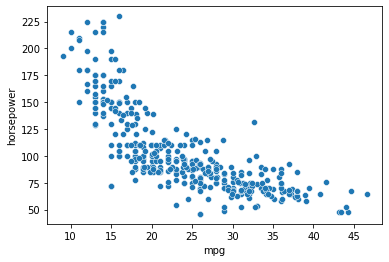

In [15]:
sns.scatterplot(x=dfsel.mpg, y=dfsel.horsepower);

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()

In [11]:
import pandas as pd

dfnorm = pd.DataFrame(scaler.fit_transform(dfsel), columns=dfsel.columns)
dfnorm

,mpg,horsepower
0,0.239362,0.456522
1,0.159574,0.646739
2,0.239362,0.565217
3,0.186170,0.565217
4,0.212766,0.510870
...,...,...
387,0.478723,0.217391
388,0.930851,0.032609
389,0.611702,0.206522
390,0.505319,0.179348


# `KMeans()` Model in Python

## Build the Model

> 1. **Necesity**: Build Model
> 2. **Google**: How do you search for the solution?
> 3. **Solution**: Find the `function()` that makes it happen

## Code Thinking

> Which function computes the Model?
> - `fit()`
>
> How could can you **import the function in Python**?

In [21]:
from sklearn.cluster import KMeans

In [22]:
model = KMeans(n_clusters=3)

### Separate Variables for the Model

> Regarding their role:
> 1. **Target Variable `y`**
>
> - [ ] What would you like **to predict**?
>
> Total number of accients? Or Alcohol?
>
> 2. **Explanatory Variable `X`**
>
> - [ ] Which variable will you use **to explain** the target?

### Data Visualization to Analyize Patterns

> - Visualize the 2 variables with a `scatterplot()`
> - And decide *how many `clusters`* you'd like to calculate

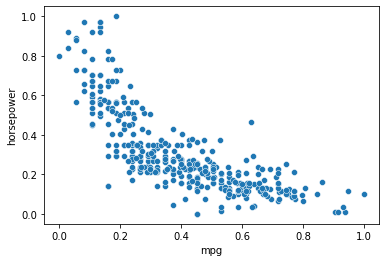

In [23]:
sns.scatterplot(x=dfnorm.mpg, y=dfnorm.horsepower);

### Finally `fit()` the Model

In [24]:
dfnorm

,mpg,horsepower
0,0.239362,0.456522
1,0.159574,0.646739
2,0.239362,0.565217
3,0.186170,0.565217
4,0.212766,0.510870
...,...,...
387,0.478723,0.217391
388,0.930851,0.032609
389,0.611702,0.206522
390,0.505319,0.179348


In [25]:
model.fit(X=dfnorm)

KMeans(n_clusters=3)

## `predict()` the *cluster* for every row

> - `model.` + `↹`

In [26]:
X

NameError: name 'X' is not defined

In [27]:
sns.scatterplot(y=0, x=X)

NameError: name 'X' is not defined

In [28]:
X

NameError: name 'X' is not defined

In [29]:
pred = model.predict(X=dfnorm)

> - Create a `dfsel` DataFrame
> - That contains the **columns you used for the model**

In [30]:
dfsel

,mpg,horsepower
name,,
chevrolet chevelle malibu,18.0,130.0
buick skylark 320,15.0,165.0
plymouth satellite,18.0,150.0
amc rebel sst,16.0,150.0
ford torino,17.0,140.0
...,...,...
ford mustang gl,27.0,86.0
vw pickup,44.0,52.0
dodge rampage,32.0,84.0


> - Add a **new column**
> - That **contains the `cluster` prediction** for every USA State

In [31]:
dfsel['cluster'] = pred

In [32]:
dfsel

,mpg,horsepower,cluster
name,,,
chevrolet chevelle malibu,18.0,130.0,1
buick skylark 320,15.0,165.0,1
plymouth satellite,18.0,150.0,1
amc rebel sst,16.0,150.0,1
ford torino,17.0,140.0,1
...,...,...,...
ford mustang gl,27.0,86.0,2
vw pickup,44.0,52.0,0
dodge rampage,32.0,84.0,0


## Model Visualization

> - You may `hue=` the points with the `cluster` column

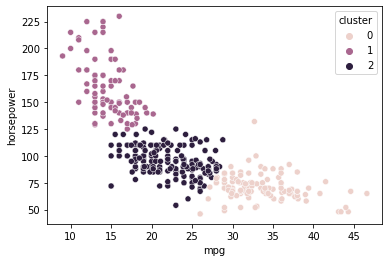

In [39]:
sns.scatterplot(x=dfsel.mpg, y=dfsel.horsepower, hue=dfsel.cluster);

## Model Interpretation

In [36]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/4b5d3muPQmA" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

> - Can you put a **`nickname` to each group**?
> - Observe the `centroids` within `model.` + `↹`

In [61]:
centroids = model.cluster_centers_
centroids

array([[0.64817629, 0.13305512],
       [0.14790491, 0.62805013],
       [0.34898878, 0.26436335]])

## Model Visualization with Centroids

> - I want to see the `centroid`
> - with a **big `markers="X"`** in the plot

In [70]:
sns.scatterplot(x=dfsel.mpg, y=dfsel.horsepower, hue=dfsel.cluster, markers={centroids: 'X'})

TypeError: unhashable type: 'numpy.ndarray'

# Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [ ] Understand how the **machine optimizes a model**
    - No more than to find the best numbers for a mathematical equation
- [ ] **Residual Sum of Squares (RSS)** as a fundamental measure for the **error**. We see it on ↓
    - Neural Networks
    - Linear Regression
    - Variance
- [ ] Understand the necessity to **Scale** the Data
    - For all algorithms that involves **distance calculation**.
- [ ] Understand that programming is not an end itself, but a tool to achieve the end
    - We need to understand the problem and design the solution before coding
    - But we won't need how to design the solution if we don't know how to code first
    - Solution? Apply the discipline
- [ ] There is **not a unique way to group data**. The same way it is not a unique way ↓
    - To predict a number **Regression Mathematical Equations**
    - To predict a category **Classification Mathematical Equations**